In [ ]:

import os
os.chdir("/content/drive/MyDrive/AI/Data")

In [ ]:
import pandas as pd #perch.csv
csv_data = pd.read_csv('perch.csv')
csv_data.head()

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


In [ ]:
perch_length = csv_data[['length']]
perch_weight = csv_data['weight']

###다항회귀와 다중회귀

* 다항회귀
 > 하나의 특성값을 이용하여 차수를 높이는 회귀분석
* 다중회귀
  > 2개 이상의 특성값을 이용하는 회귀분석

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # degree : 기본값 2, include_bias(절편값 : 1)
#poly.fit([[2,3]])
#print(poly.transform([[2,3]]))
print(poly.fit_transform([[2,3]]))
poly.get_feature_names_out()

[[2. 3. 4. 6. 9.]]


array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [ ]:
#다항회귀(perch_length)
perch_poly = poly.fit_transform(perch_length)
print(perch_poly.shape)
poly.get_feature_names_out()

(56, 2)


array(['length', 'length^2'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(perch_poly, perch_weight, random_state=42)
print(train_data.shape, test_data.shape)

(42, 2) (14, 2)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_data, train_target)
print('정확도 : ', model.score(test_data, test_target))

정확도 :  0.9775935108325122


In [ ]:
pred_data = pd.read_csv('perch_test.csv')
pred_poly = poly.transform(pred_data)
print(pred_poly)
poly.get_feature_names_out()

[[   50.  2500.]
 [  100. 10000.]]


array(['length', 'length^2'], dtype=object)

In [ ]:
print(model.predict(pred_poly))

[1573.98423528 8103.57880667]


In [ ]:
import pandas as pd #perch_full.csv
csv_data = pd.read_csv('perch_full.csv')
csv_data.head()

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [ ]:
perch_data = csv_data[['length', 'height', 'width']]
perch_target = csv_data['weight']

In [ ]:
#훈련,테스트 데이터 분리
train_data2, test_data2, train_target2, test_target2 = train_test_split(perch_data, perch_target, random_state=42)
print(train_data2.shape, test_data2.shape)

(42, 3) (14, 3)


In [ ]:
#모델학습 및 정확도
model2 = LinearRegression()
model2.fit(train_data2, train_target2)
print('정확도 : ', model2.score(test_data2, test_target2))

정확도 :  0.8796419177546366


In [ ]:
#다중회귀(train_data)
train_poly = poly.fit_transform(train_data2)
print(train_poly.shape)
poly.get_feature_names_out()

(42, 9)


array(['length', 'height', 'width', 'length^2', 'length height',
       'length width', 'height^2', 'height width', 'width^2'],
      dtype=object)

In [ ]:
test_poly = poly.transform(test_data2)

#모델 훈련 및 정확도
model2.fit(train_poly, train_target2)
print('정확도 : ', model2.score(test_poly, test_target2))

정확도 :  0.9714559911594111


In [ ]:
#다중회귀(degree=5)
poly2 = PolynomialFeatures(degree=5, include_bias=False)
train_poly2 = poly2.fit_transform(train_data2)
print(train_poly2.shape)
poly2.get_feature_names_out()

(42, 55)


array(['length', 'height', 'width', 'length^2', 'length height',
       'length width', 'height^2', 'height width', 'width^2', 'length^3',
       'length^2 height', 'length^2 width', 'length height^2',
       'length height width', 'length width^2', 'height^3',
       'height^2 width', 'height width^2', 'width^3', 'length^4',
       'length^3 height', 'length^3 width', 'length^2 height^2',
       'length^2 height width', 'length^2 width^2', 'length height^3',
       'length height^2 width', 'length height width^2', 'length width^3',
       'height^4', 'height^3 width', 'height^2 width^2', 'height width^3',
       'width^4', 'length^5', 'length^4 height', 'length^4 width',
       'length^3 height^2', 'length^3 height width', 'length^3 width^2',
       'length^2 height^3', 'length^2 height^2 width',
       'length^2 height width^2', 'length^2 width^3', 'length height^4',
       'length height^3 width', 'length height^2 width^2',
       'length height width^3', 'length width^4', 'height^5

In [ ]:
test_poly2 = poly2.transform(test_data2)

#모델 훈련 및 정확도
model2.fit(train_poly2, train_target2)
print('훈련데이터의 정확도 : ', model2.score(train_poly2, train_target2))
print('테스트데이터의 정확도 : ', model2.score(test_poly2, test_target2))

훈련데이터의 정확도 :  0.9999999999996433
테스트데이터의 정확도 :  -144.40579436844948


###과대적합(Overfitting) & 과소적합(Underfitting)

![](https://images.velog.io/images/arittung/post/d68462e5-77cb-47fc-acee-a8cb5ea1925d/image.png)

과대 적합(Overfitting)

* 모델이 훈련 세트에서는 좋은 성능을 내지만 검증 세트에서는 낮은 성능을 내는 경우.

* 훈련 세트와 검증 세트에서 측정한 성능의 간격이 큼. (== 분산이 큼(high variance))

* 과대 적합의 주요 원인
: 훈련 세트에 충분히 다양한 샘플이 포함되지 않음.

* 해결 방법 :

> 1) 훈련 세트에 충분히 다양한 샘플을 포함시킴.

> 2) 훈련 샘플을 더 모을 수 없는 경우, 모델이 훈련 세트에 집착하지 않도록 가중치를 제한함. (= 모델의 복잡도를 낮춤)

> 3) 훈련 데이터의 잡음을 줄임.(Outlier, Error 제거)

과소 적합(Underfitting)

* 훈련 세트와 검증 세트의 성능에는 차이가 크지 않지만 모두 낮은 성능을 내는 경우. 훈련 세트와 검증 세트의 성능이 서로 가까워지면 성능 자체가 낮음.

* 과소적합된 모델을 '편향이 크다(high bias)'라고도 함.

* 해결 방법 :

> 1) 복잡도가 더 높은 모델(파라미터가 더 많은 모델) 사용

> 2) 가중치 규제 완화

### 규제
* 릿지(Ridge) = (L2규제) = $(가중치)^2$
* 라쏘(Lasso) = (L1규제) = |가중치|

In [ ]:
#표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_poly2)
test_scaled = ss.transform(test_poly2)

In [ ]:
#모델 훈련 및 정확도
model2.fit(train_scaled, train_target2)
print('훈련데이터의 정확도 : ', model2.score(train_scaled, train_target2))
print('테스트데이터의 정확도 : ', model2.score(test_scaled, test_target2))

훈련데이터의 정확도 :  1.0
테스트데이터의 정확도 :  -358.85068551974916


In [ ]:
#릿지 규제
from sklearn.linear_model import Ridge
ridge = Ridge()
#alpha(규제강도):하이퍼파라미터(사용자 지정 값), 알파값이 커지면 규제강도 커짐
ridge.fit(train_scaled, train_target2)
print('훈련데이터의 정확도 : ', ridge.score(train_scaled, train_target2))
print('테스트데이터의 정확도 : ', ridge.score(test_scaled, test_target2))

훈련데이터의 정확도 :  0.9896101671037343
테스트데이터의 정확도 :  0.9790693977615387


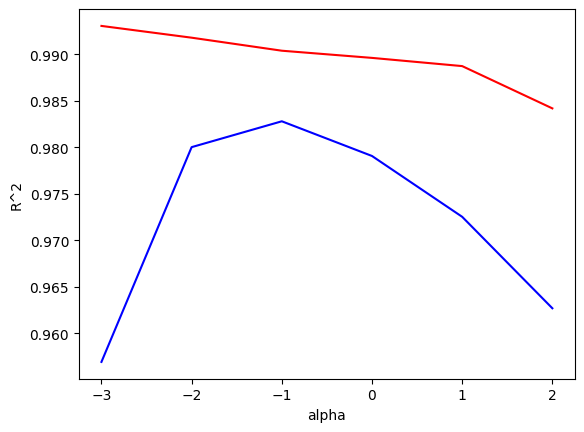

In [ ]:
#최적의 하이퍼파라미터(alpha값)_Ridge
import numpy as np
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target2)
  train_score.append(ridge.score(train_scaled, train_target2))
  test_score.append(ridge.score(test_scaled, test_target2))

plt.plot(np.log10(alpha_list), train_score, color='red')
plt.plot(np.log10(alpha_list), test_score, color='blue')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
#Ridge 훈련 및 정확도(alpha=0.1)
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target2)
print('훈련데이터의 정확도 : ', ridge.score(train_scaled, train_target2))
print('테스트데이터의 정확도 : ', ridge.score(test_scaled, test_target2))

훈련데이터의 정확도 :  0.9903815817570367
테스트데이터의 정확도 :  0.9827976465386928


In [ ]:
print(np.sum(ridge.coef_ == 0))

0


In [ ]:
#Lasso 훈련 및 정확도
from sklearn.linear_model import Lasso
lasso = Lasso()
#alpha(규제강도):하이퍼파라미터(사용자 지정 값), 알파값이 커지면 규제강도 커짐
lasso.fit(train_scaled, train_target2)
print('훈련데이터의 정확도 : ', lasso.score(train_scaled, train_target2))
print('테스트데이터의 정확도 : ', lasso.score(test_scaled, test_target2))

훈련데이터의 정확도 :  0.989789897208096
테스트데이터의 정확도 :  0.9800593698421883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

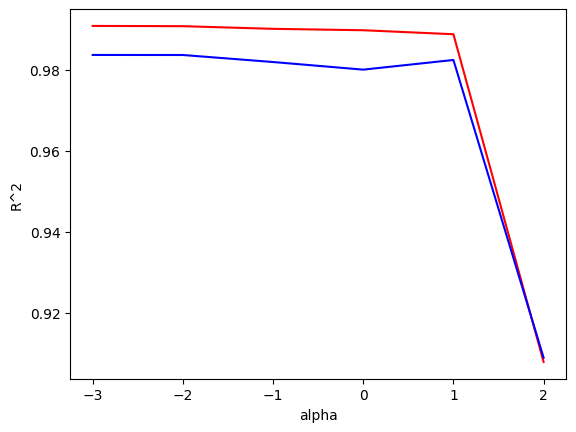

In [ ]:
#최적의 하이퍼파라미터(alpha값)_Lasso
train_score2 = []
test_score2 = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha)
  lasso.fit(train_scaled, train_target2)
  train_score2.append(lasso.score(train_scaled, train_target2))
  test_score2.append(lasso.score(test_scaled, test_target2))

plt.plot(np.log10(alpha_list), train_score2, color='red')
plt.plot(np.log10(alpha_list), test_score2, color='blue')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
#Lasso 훈련 및 정확도(alpha=10)
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target2)
print('훈련데이터의 정확도 : ', lasso.score(train_scaled, train_target2))
print('테스트데이터의 정확도 : ', lasso.score(test_scaled, test_target2))

훈련데이터의 정확도 :  0.9888067471131867
테스트데이터의 정확도 :  0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))
print(lasso.coef_ == 0)

40
[ True  True  True False False False  True  True False  True False False
 False False False  True  True False False  True  True  True  True  True
  True False  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True False  True  True  True  True  True]


In [ ]:
print(np.sum(lasso.coef_ != 0))
print(lasso.coef_)

15
[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
